<a href="https://colab.research.google.com/github/nur-kashaf/condition/blob/main/kashaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("forderation/breakhis-400x")

print("Path to dataset files:", path)

100%|██████████| 803M/803M [00:13<00:00, 62.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/forderation/breakhis-400x/versions/1


In [2]:
ls /root/.cache/kagglehub/datasets/forderation/breakhis-400x/versions/1

'BreaKHis 400X'/


In [3]:
import os

def list_directory_hierarchy(directory, level=0):
    """
    Recursively lists the hierarchy of a directory and its subdirectories.

    :param directory: Path of the directory to explore
    :param level: Current depth level in the directory hierarchy
    """
    try:
        # List all files and directories in the current directory
        items = os.listdir(directory)

        # Loop through the items and print the directory structure
        for item in items:
            item_path = os.path.join(directory, item)
            if os.path.isdir(item_path):  # If it's a directory, explore it further
                print('  ' * level + f'[{item}/]')  # Indent to represent hierarchy
                list_directory_hierarchy(item_path, level + 1)  # Recursive call for subdirectory
            else:
                print('  ' * level + item)  # Print the file name
    except Exception as e:
        print(f"Error accessing directory {directory}: {e}")

# Path to your dataset
dataset_path = '/root/.cache/kagglehub/datasets/forderation/breakhis-400x/versions/1/'

# Fetch and print the hierarchy of the dataset
list_directory_hierarchy(dataset_path)


[BreaKHis 400X/]
  [train/]
    [benign/]
      SOB_B_A-14-29960CD-400-012.png
      SOB_B_A-14-22549G-400-010.png
      SOB_B_A-14-22549CD-400-007.png
      SOB_B_TA-14-15275-400-010.png
      SOB_B_TA-14-3411F-400-009.png
      SOB_B_F-14-21998EF-400-014.png
      SOB_B_F-14-14134E-400-005.png
      SOB_B_PT-14-22704-400-022.png
      SOB_B_F-14-21998EF-400-027.png
      SOB_B_TA-14-13200-400-008.png
      SOB_B_F-14-14134-400-019.png
      SOB_B_TA-14-13200-400-007.png
      SOB_B_F-14-23222AB-400-012.png
      SOB_B_F-14-23222AB-400-003.png
      SOB_B_F-14-23060CD-400-006.png
      SOB_B_TA-14-16184-400-008.png
      SOB_B_F-14-21998EF-400-006.png
      SOB_B_TA-14-3411F-400-005.png
      SOB_B_TA-14-16184CD-400-024.png
      SOB_B_PT-14-21998AB-400-040.png
      SOB_B_PT-14-21998AB-400-057.png
      SOB_B_PT-14-21998AB-400-029.png
      SOB_B_TA-14-16184-400-021.png
      SOB_B_F-14-14134-400-031.png
      SOB_B_F-14-29960AB-400-005.png
      SOB_B_F-14-14134-400-004.png
      SO

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Define paths to the directories
train_dir = '/root/.cache/kagglehub/datasets/forderation/breakhis-400x/versions/1/BreaKHis 400X/train/'
test_dir = '/root/.cache/kagglehub/datasets/forderation/breakhis-400x/versions/1/BreaKHis 400X/test/'

# Set up image generators for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,      # Normalize the images
    shear_range=0.2,     # Random shear transformation
    zoom_range=0.2,      # Random zoom
    horizontal_flip=True # Random horizontal flip
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for the test set

# Load images from the directories and apply transformations
train_data = train_datagen.flow_from_directory(
    train_dir,             # Path to the train directory
    target_size=(64, 64),  # Resize images to 64x64 pixels
    batch_size=32,         # Batch size
    class_mode='binary'    # Binary classification (benign vs malignant)
)

test_data = test_datagen.flow_from_directory(
    test_dir,              # Path to the test directory
    target_size=(64, 64),  # Resize images to 64x64 pixels
    batch_size=32,         # Batch size
    class_mode='binary'    # Binary classification
)


Found 1148 images belonging to 2 classes.
Found 545 images belonging to 2 classes.


In [6]:
# Build a CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),  # Flatten the 2D outputs to 1D
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(
    train_data,          # Training data
    steps_per_epoch=100, # Number of steps per epoch
    epochs=15,           # Number of epochs
    validation_data=test_data,  # Validation data
    validation_steps=25  # Number of validation steps
)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 29/100 ━━━━━━━━━━━━━━━━━━━━ 36s 513ms/step - accuracy: 0.6397 - loss: 0.6380

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 232ms/step - accuracy: 0.6863 - loss: 0.5980 - val_accuracy: 0.7450 - val_loss: 0.5737
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 234ms/step - accuracy: 0.7814 - loss: 0.4939 - val_accuracy: 0.6899 - val_loss: 0.5672
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 178ms/step - accuracy: 0.8027 - loss: 0.4756 - val_accuracy: 0.8128 - val_loss: 0.4801
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 181ms/step - accuracy: 0.8278 - loss: 0.4358 - val_accuracy: 0.7725 - val_loss: 0.5171
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 174ms/step - accuracy: 0.8336 - loss: 0.4405 - val_accuracy: 0.8073 - val_loss: 0.4872
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 173ms/step - accuracy: 0.8444 - loss: 0.4190 - val_accuracy: 0.8202 - val_loss: 0.4751
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - accuracy: 0.8504 - loss: 0.4124 - val_accuracy: 0.7560 - val_loss: 0.5553
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 181ms/step - accuracy: 0.8055 - loss: 0.4543 - val

In [9]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data, steps=25)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 264ms/step - accuracy: 0.8275 - loss: 0.4462
Test Accuracy: 83.67%


In [10]:
# Save the model to a file
model.save('breast_cancer_model.h5')


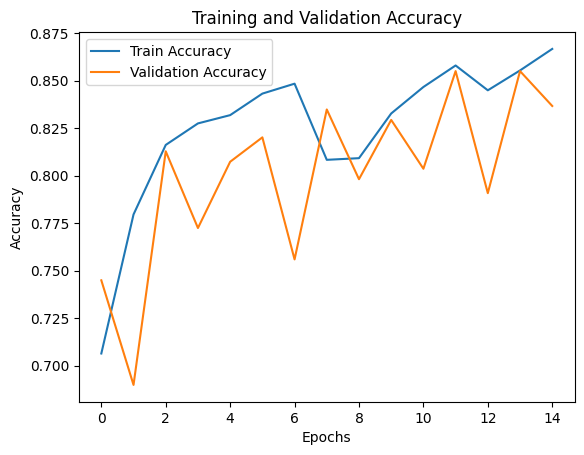

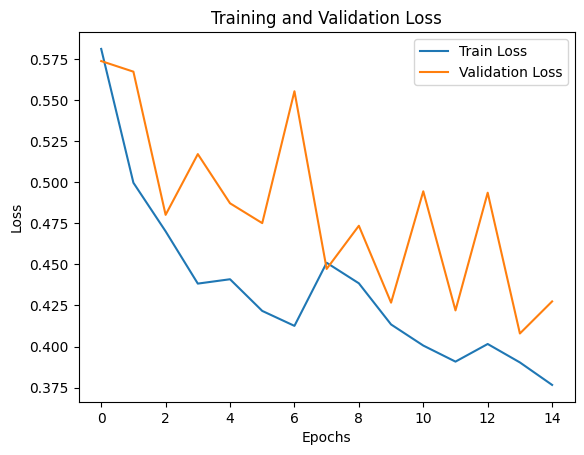

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 341ms/step


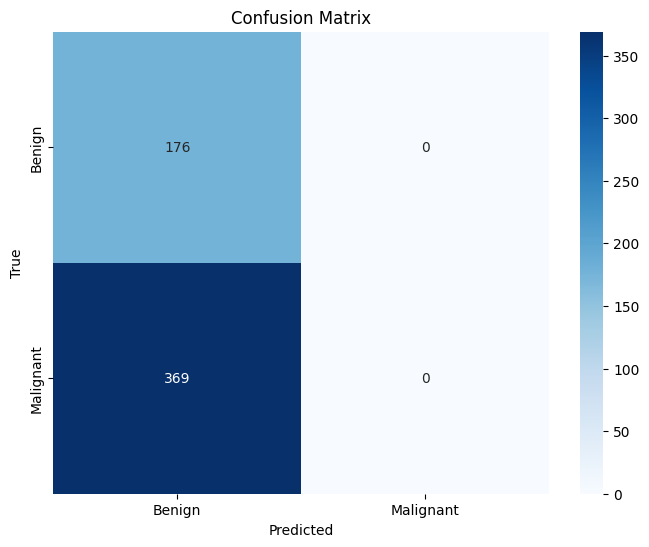

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Predict on the test set
y_pred = model.predict(test_data, steps=test_data.samples // test_data.batch_size + 1)
y_pred = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Get true labels
y_true = test_data.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **Enhanced Data Augmentation:**

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define an enhanced data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,        # Randomly rotate images by up to 40 degrees
    width_shift_range=0.2,    # Shift images horizontally by 20%
    height_shift_range=0.2,   # Shift images vertically by 20%
    shear_range=0.2,          # Apply random shearing transformations
    zoom_range=0.2,           # Apply random zooms
    horizontal_flip=True,     # Flip images horizontally
    fill_mode='nearest'       # Fill empty pixels after transformation
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Applying augmented data to the train and test generators
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


Found 1148 images belonging to 2 classes.
Found 545 images belonging to 2 classes.


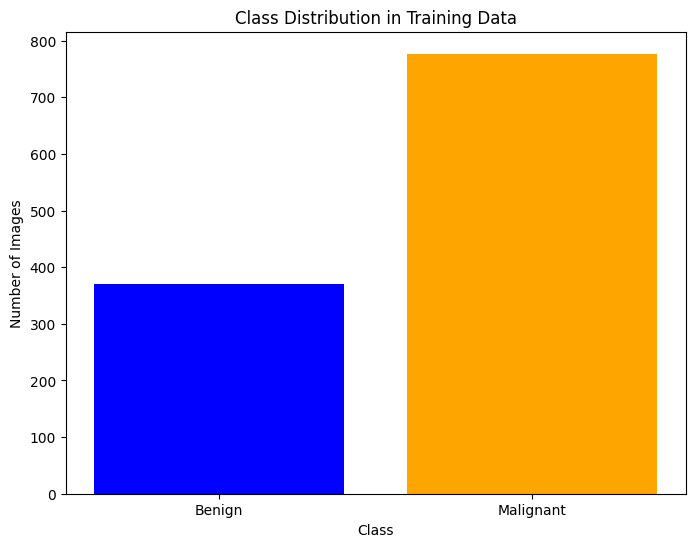

In [17]:
import os

# Get number of images in each class for training
benign_count = len(os.listdir(train_dir + 'benign/'))
malignant_count = len(os.listdir(train_dir + 'malignant/'))

# Plot class distribution
plt.figure(figsize=(8, 6))
classes = ['Benign', 'Malignant']
counts = [benign_count, malignant_count]
plt.bar(classes, counts, color=['blue', 'orange'])
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 703ms/step


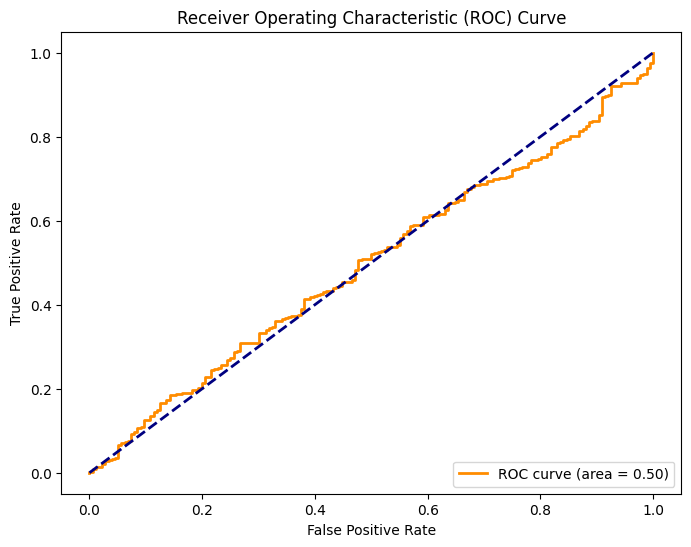

In [15]:
from sklearn.metrics import roc_curve, auc

# Ensure model output is a probability for both classes (binary classification)
y_prob = model.predict(test_data, steps=test_data.samples // test_data.batch_size + 1)

# For binary classification with sigmoid, y_prob will have a shape of (samples, 1)
# We need to access the probabilities for the positive class, so we use y_prob[:, 0]
fpr, tpr, thresholds = roc_curve(y_true, y_prob[:, 0])  # Use y_prob[:, 0] for the negative class
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


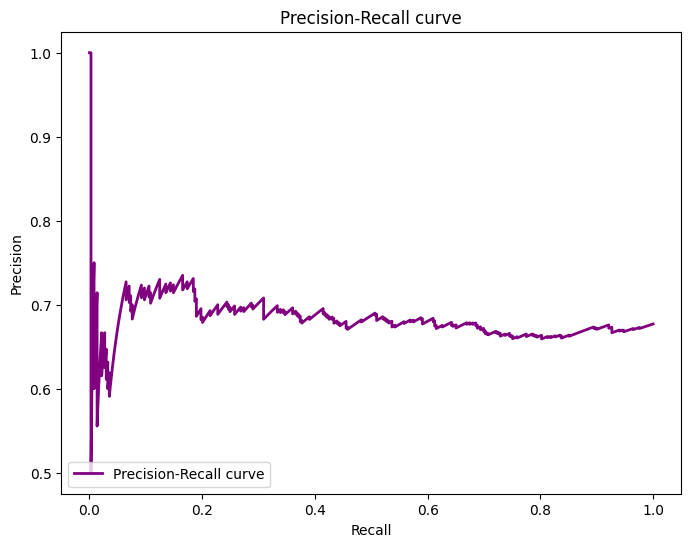

In [22]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_prob[:, 0])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label='Precision-Recall curve')
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


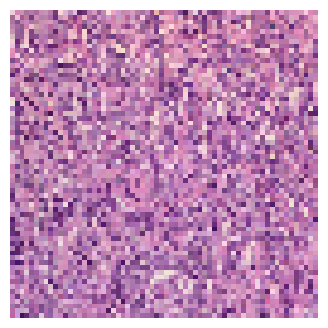

Prediction: Malignant


In [21]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess the image
img_path = '/content/test3.png'  # Replace with the actual image path
img = image.load_img(img_path, target_size=(64, 64))  # Resize image to 64x64
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (model expects a batch)
img_array /= 255.0  # Normalize the image (same as training data)

# Make the prediction
prediction = model.predict(img_array)

# Display the image with reduced size
plt.figure(figsize=(4, 4))  # Set the size of the displayed image (width, height)
plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.show()

# Output the prediction
if prediction < 0.5:
    print("Prediction: Benign")
else:
    print("Prediction: Malignant")
